# پیش گفتار

انتشار گازهای گلخانه ای ناشی از فعالیت های اقتصادی و مصرف انرژی فسیلی عامل مهمی در گرم شدن زمین است. اهمیت این موضوع در کشورهای عضو اوپک به دلیل وابستگی اقتصادی این کشورها به سوخت های فسیلی از یک سو و همچنین آسیب پذیری اقتصادی این کشورها در برابر اجرای کنوانسیون تغییرات آب و هوا و پروتکل کیوتو توسط کشورهای صنعتی به کاهش مصرف سوخت فسیلی حائز اهمیت است
درنتیجه برای ما برسی و پیش بینی میزان انتشار هر گاز به نوه خود از اهمیت به سزایی برخودار است

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow.keras.layers as L
from tensorflow.keras import callbacks, Sequential
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler


In [3]:
sns.set_theme(context='notebook', style='darkgrid')

In [4]:

df = pd.read_csv(r"C:\Users\mj749\Downloads\Iran Greenhouse Gas (GHG) Emissions 1960-2014.csv")#,index_col=[0])

# gas

In [5]:

df = pd.read_csv(r"C:\Users\mj749\Downloads\Iran Greenhouse Gas (GHG) Emissions 1960-2014.csv")#

In [6]:
df.head()

,Year,Adjusted savings: carbon dioxide damage (% of GNI),Adjusted savings: carbon dioxide damage (current US$),CO2 emissions (kg per 2010 US$ of GDP),CO2 emissions (kg per 2011 PPP $ of GDP),CO2 emissions (kg per PPP $ of GDP),CO2 emissions (kt),CO2 emissions (metric tons per capita),"CO2 emissions from electricity and heat production, total (% of total fuel combustion)",CO2 emissions from gaseous fuel consumption (% of total),...,Methane emissions in energy sector (thousand metric tons of CO2 equivalent),Methane emissions (kt of CO2 equivalent),Agricultural methane emissions (% of total),Agricultural nitrous oxide emissions (% of total),Agricultural methane emissions (thousand metric tons of CO2 equivalent),Agricultural nitrous oxide emissions (thousand metric tons of CO2 equivalent),Other greenhouse gas emissions (% change from 1990),"Other greenhouse gas emissions, HFC, PFC and SF6 (thousand metric tons of CO2 equivalent)",Total greenhouse gas emissions (% change from 1990),Total greenhouse gas emissions (kt of CO2 equivalent)
0,1960,..,..,0.62,..,..,37392.40,1.71,..,4.92,...,..,..,..,..,..,..,..,..,..,..
1,1961,..,..,0.55,..,..,36541.66,1.63,..,5.21,...,..,..,..,..,..,..,..,..,..,..
2,1962,..,..,0.52,..,..,37462.07,1.62,..,5.44,...,..,..,..,..,..,..,..,..,..,..
3,1963,..,..,0.54,..,..,41341.76,1.75,..,5.34,...,..,..,..,..,..,..,..,..,..,..
4,1964,..,..,0.57,..,..,47560.99,1.96,..,4.86,...,..,..,..,..,..,..,..,..,..,..


In [7]:
df2 = df.select_dtypes(include=["number"])
df2 = df2.set_index("Year")

In [9]:
df2.head()

,CO2 emissions (kg per 2010 US$ of GDP),CO2 emissions (kt),CO2 emissions (metric tons per capita),CO2 emissions from gaseous fuel consumption (% of total),CO2 emissions from gaseous fuel consumption (kt),CO2 emissions from liquid fuel consumption (% of total),CO2 emissions from liquid fuel consumption (kt),CO2 emissions from solid fuel consumption (% of total),CO2 emissions from solid fuel consumption (kt)
Year,,,,,,,,,
1960,0.62,37392.40,1.71,4.92,1840.83,58.45,21855.32,1.64,612.39
1961,0.55,36541.66,1.63,5.21,1903.17,52.93,19339.76,1.44,524.38
1962,0.52,37462.07,1.62,5.44,2038.85,49.98,18723.70,1.45,542.72
1963,0.54,41341.76,1.75,5.34,2207.53,49.08,20289.51,1.46,605.06
1964,0.57,47560.99,1.96,4.86,2310.21,49.60,23589.81,1.53,726.07


In [10]:
df2.shape

(55, 9)

In [16]:
# df2.select_dtypes(exclude=["object"]).shape


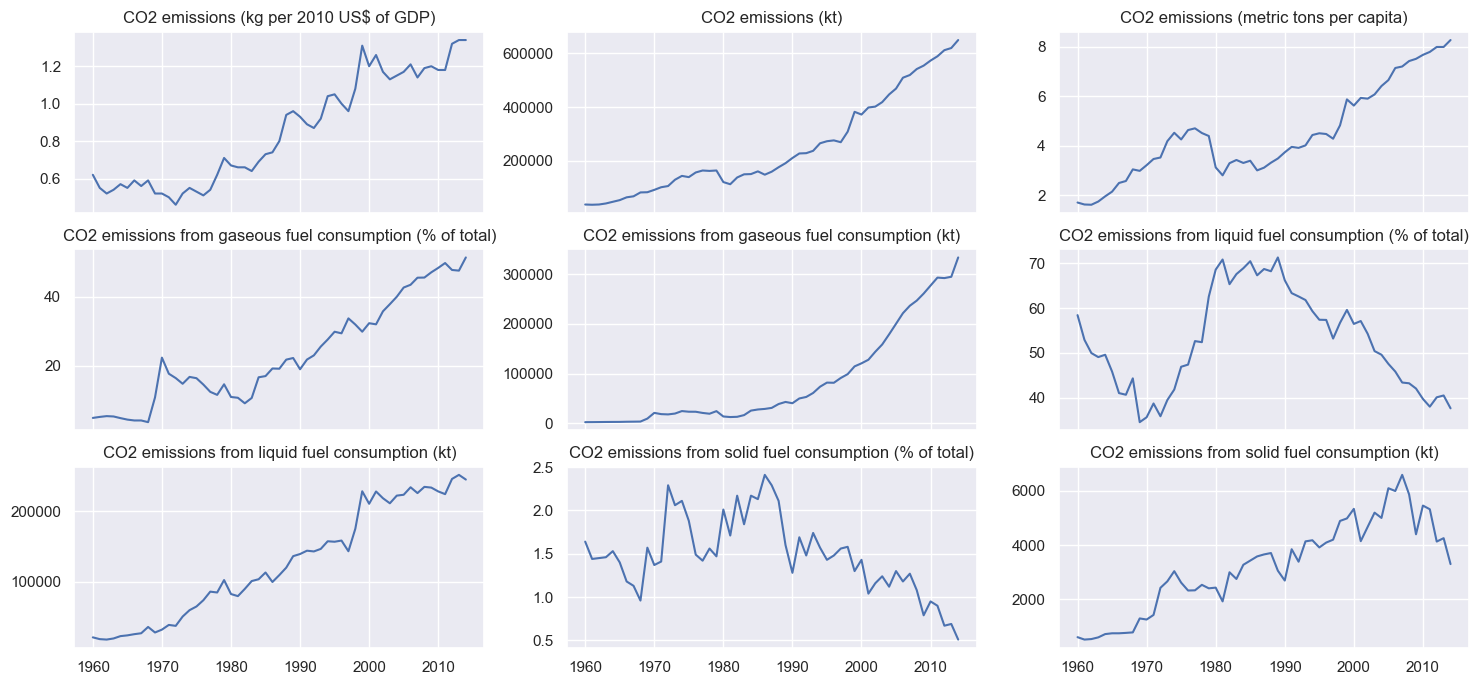

In [21]:

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 8),sharex=True)
for i, col in enumerate(df2.columns):
    row = i//3
    ncol = i%3
    axes[row,ncol].plot(df2[col])
    axes[row,ncol].set_title(col)


In [4]:
# df.head(60)

# fill nan values

In [5]:
# df.ffill(limit=1,inplace=True)

# df.bfill(limit=1,inplace=True)

In [6]:
# df.head(35)

In [7]:
# df.head(60)

In [8]:
df.tail()

,year,f,g,p,o
58,2018,12.952516,8.643942e+13,7.591945e+09,NaN
59,2019,12.334776,8.779853e+13,7.673534e+09,NaN
60,2020,9.170044,NaN,7.820964e+09,NaN
61,2021,11.511183,NaN,7.888161e+09,NaN
62,2022,16.323879,NaN,7.951150e+09,NaN


In [9]:
df.isna().sum()

year    0
f       4
g       3
p       0
o       6
dtype: int64

In [10]:
df.columns

Index(['year', 'f', 'g', 'p', 'o'], dtype='object')

In [11]:
# # Fill in the remaining missing values that are not at the end
# for col in range(len(df.columns)):
#     avg = df.iloc[:,col].mean()
#     for i in df.index:
#         if i not in df.tail().index :
#             # print("x")
#             if pd.isnull(df.iloc[i,col]):
#                 print("y")
#                 df.iloc[i,col]=avg


In [12]:
df.tail(10)

,year,f,g,p,o
53,2013,17.133516,7.731634e+13,7.169638e+09,4.721057
54,2014,15.948512,7.945325e+13,7.254227e+09,4.701148
55,2015,11.331595,7.521772e+13,7.338965e+09,4.638348
56,2016,9.699290,7.636900e+13,7.424286e+09,4.555239
57,2017,11.266807,8.130603e+13,7.509074e+09,NaN
58,2018,12.952516,8.643942e+13,7.591945e+09,NaN
59,2019,12.334776,8.779853e+13,7.673534e+09,NaN
60,2020,9.170044,NaN,7.820964e+09,NaN
61,2021,11.511183,NaN,7.888161e+09,NaN
62,2022,16.323879,NaN,7.951150e+09,NaN


In [13]:
df.isna().sum()

year    0
f       4
g       3
p       0
o       6
dtype: int64

In [14]:
df

,year,f,g,p,o
0,1960,NaN,1.369444e+12,3.031438e+09,3.045939
1,1961,NaN,1.425115e+12,3.072481e+09,2.992537
2,1962,11.510025,1.530069e+12,3.125457e+09,3.038068
3,1963,10.703259,1.648305e+12,3.190564e+09,3.141706
4,1964,10.517353,1.805674e+12,3.256065e+09,3.241921
...,...,...,...,...,...
58,2018,12.952516,8.643942e+13,7.591945e+09,NaN
59,2019,12.334776,8.779853e+13,7.673534e+09,NaN
60,2020,9.170044,NaN,7.820964e+09,NaN
61,2021,11.511183,NaN,7.888161e+09,NaN


In [15]:
df2=df.set_index("year")


In [6]:

fig, axes = plt.subplots(nrows=1, ncols=len(df2.columns), figsize=(12, 5))
for i, col in enumerate(df2.columns):
    df[col].plot(ax=axes[i], title=col)

NameError: name 'df2' is not defined

## modeling

In [22]:

def model (X_train,y_train):

    try:
        n_features =  1 if X_train.shape[1] <1 else X_train.shape[1]
    except IndexError:
        n_features=1
    print(n_features)
    epochs = 300

    lstm_model = Sequential()
    lstm_model.add(L.LSTM(100, input_shape=(n_features,1), activation='tanh', return_sequences=True,recurrent_activation="sigmoid",recurrent_dropout=0,unroll=False,use_bias=True))
    lstm_model.add(L.LSTM(100, activation='tanh'))
    lstm_model.add(L.Dense(10, kernel_initializer='glorot_normal',activation='relu'))
    lstm_model.add(L.Dense(1))
    lstm_model.summary()

    lstm_model.compile(loss='mse', optimizer="adam"  )

    callback = [
        callbacks.EarlyStopping(monitor = 'loss', patience = 10)
    ]

    lstm_history = lstm_model.fit(X_train, y_train,
                                  callbacks=callback ,
                                  epochs=epochs,
                                  batch_size=8
                                            )
    # y_pred = lstm_model.predict(X_test)
    return lstm_model

In [24]:

def augmentation(data:pd.DataFrame):
    n=2
    df=pd.DataFrame(data,columns=["values"])
    for i in range(1,n+1):
        
        df[f"{i} day before value"]=df["values"].shift(i)
        if i == 1 :
            continue
        df[f"{i} day before diff"] = df[f"{i} day before value"].diff(i)

    # df=df.ffill(limit=n)
    # df=df.bfill(limit=n)
    
    df.dropna(inplace=True)
    # if df.isna().sum().sum():
    #    pass
    #     # df.fillna(df.mean())
    print(f"nan : {df.isna().sum().sum()}")
    
    df = df.values
    scaler1 = StandardScaler()
    scaler2 = StandardScaler()
    y = scaler1.fit_transform(df[:,0].reshape(-1,1))
    X = scaler2.fit_transform(df[:,1:])
    
    return X , y , scaler1
    

In [25]:

def split_predict(data,indexs):
    
    # scaler1 = StandardScaler()
    # scaler2 = StandardScaler()
    # y = scaler1.fit_transform(data[:,0].reshape(-1,1))
    # X = scaler2.fit_transform(data[:,1:])
    X , y , scaler1 =  augmentation(data)
    indexs = indexs[:X.shape[0]]
    minimum = indexs.min()
    indexs= indexs- minimum
    # X = np.array((indexs,X[:,0],X[:,1]),dtype=np.float32).T
    print(X.shape)
    print(len(indexs))
    X = np.concatenate((X, np.expand_dims(indexs, axis=1)), axis=1)
    n_feature = X.shape[1]
    X_train,X_test,y_train,y_test = train_test_split(X,y.reshape(-1) ,test_size=.2, shuffle=True,random_state=313)
    indexs_test = X_test[:,-1]
    X_train=X_train.reshape(-1,n_feature,1)
    X_test=X_test.reshape(-1,n_feature,1)
    y_train=y_train.reshape(-1,1,1)
    lstm_model = model(X_train,y_train)
    y_pred =lstm_model.predict(X_test)
    # X_test =scaler2.inverse_transform(X_test.reshape(-1,3))
    print(X_test.shape)
    return scaler1.inverse_transform(y_pred.reshape(-1,1))  , scaler1.inverse_transform(y_test.reshape(-1,1))  , indexs_test + minimum



In [43]:
# df4 = df2.values.T
# indexs = np.array(df.year,dtype=np.float32)
# predict_df2= pd.DataFrame()
# # for col in range(1):
# for col in range(df4.shape[0]):
#     scaler1 = StandardScaler()
#     data = df4[col][pd.notna(df4[col])]
#     data=scaler1.fit_transform(df4[col][pd.notna(df4[col])].reshape(-1,1))

#     y_pred,y_true,index_pred= split_predict(data,indexs[:data.shape[0]] )
#     col_name = str(df2.columns[col])
#     dict_temp = {col_name+"_pred":scaler1.inverse_transform(y_pred).reshape(-1) , col_name+"_true":scaler1.inverse_transform(y_true).reshape(-1)}

#     df_temp=pd.DataFrame(dict_temp,index=index_pred.astype(int))
#     predict_df2 = pd.concat([predict_df2,df_temp],axis=1)


In [44]:
a = np.array(((1,2,3,4,5),(1,2,3,3,4,))).T
b = np.array((1,1,1,1,1))
np.concatenate((a, np.expand_dims(b, axis=1)), axis=1).shape

(5, 3)

In [45]:
df2=df.set_index('year')

In [27]:
# df4 = df2.values.T
indexs = np.array(df.Year,dtype=np.float32)
predict_df2= pd.DataFrame()
# for col in range(1):
for col in range(len(df2.columns)):
    scaler1 = StandardScaler()
    # data=scaler1.fit_transform(df4[col][pd.notna(df4[col])].reshape(-1,1))
    
    # df_temp = pd.DataFrame(df4[1][pd.notna(df4[1])],columns=['value'])
    # df_temp["yesterday_diff"] = df_temp['value'].diff(1)
    # df_temp['yaterday_value']=df_temp['value'].shift(1)
    # df_temp.fillna(0,inplace=True)
    # y_pred,y_true,index_pred= split_predict(df_temp.values,indexs[:df_temp.shape[0]] )
    # data=scaler1.fit_transform(df_temp).astype(np.float32)
    
    # print(data.shape)
    y_pred,y_true,index_pred= split_predict(df2.iloc[:,col].values,indexs )
    col_name = str(df2.columns[col])
    dict_temp = {col_name+"_pred":y_pred.reshape(-1) , col_name+"_true":y_true.reshape(-1)}

    df_temp=pd.DataFrame(dict_temp,index=index_pred.astype(int))
    predict_df2 = pd.concat([predict_df2,df_temp],axis=1)


nan : 0
(51, 3)
51
4
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 4, 100)            40800     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense (Dense)                (None, 10)                1010      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 122,221
Trainable params: 122,221
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
5/5 [==============================] - 19s 20ms/step - loss: 1.0005
Epoch 2/300
5/5 [==============================] - 0s 19ms/step - loss: 0.7846
Epoch 3/300
5/5 [==============================] - 0s 17ms/step - lo

In [25]:
# def model (X_train,y_train,X_test):

#     serie_size =  X_train.shape[1] #
#     try:
#         n_features =  1 if X_train.shape[1] <1 else X_train.shape[1]
#     except IndexError:
#         n_features=1

#     epochs = 500

#     lstm_model = Sequential()
#     lstm_model.add(L.LSTM(100, input_shape=(serie_size,n_features), activation='relu', return_sequences=True))
#     lstm_model.add(L.LSTM(100, activation='relu'))
#     lstm_model.add(L.Dense(10, kernel_initializer='glorot_normal',activation='relu'))
#     lstm_model.add(L.Dense(1))
#     lstm_model.summary()

#     lstm_model.compile(loss='mse', optimizer="adam"  )

#     callback = [
#         callbacks.EarlyStopping(monitor = 'loss', patience = 10)
#     ]

#     lstm_history = lstm_model.fit(X_train, y_train,
#                                   callbacks=callback ,
#                                   epochs=epochs,
#                                             )
#     y_pred = lstm_model.predict(X_test)
#     return y_pred

In [26]:

# def split_predict(data,indexs):

#     indexs2= indexs-indexs.min()

#     X_train,X_test,y_train,y_test = train_test_split(indexs2,data ,test_size=.2, shuffle=True,random_state=313)
#     X_train=X_train.reshape(-1,1,1)
#     X_test=X_test.reshape(-1,1,1)
#     y_train=y_train.reshape(-1,1,1)

#     y_pred = model(X_train,y_train,X_test)

#     return y_pred.reshape(-1,1) , y_test.reshape(-1,1) , X_test.reshape(-1) + indexs.min()



In [ ]:
# df4 = df2.values.T
# indexs = np.array(df.year,dtype=np.float32)
# predict_df2= pd.DataFrame()
# # for col in range(1):
# for col in range(df4.shape[0]):
#     scaler1 = StandardScaler()
#     data=scaler1.fit_transform(df4[col][pd.notna(df4[col])].reshape(-1,1))

#     y_pred,y_true,index_pred= split_predict(data,indexs[:data.shape[0]] )
#     col_name = str(df2.columns[col])
#     dict_temp = {col_name+"_pred":scaler1.inverse_transform(y_pred).reshape(-1) , col_name+"_true":scaler1.inverse_transform(y_true).reshape(-1)}

#     df_temp=pd.DataFrame(dict_temp,index=index_pred.astype(int))
#     predict_df2 = pd.concat([predict_df2,df_temp],axis=1)


In [ ]:
# df4 = df2.values.T
# indexs = np.array(df.year,dtype=np.float32)
# predict_df2= pd.DataFrame()
# # for col in range(1):
# for col in range(df4.shape[0]):
#     scaler1 = StandardScaler()
#     data=scaler1.fit_transform(df4[col][pd.notna(df4[col])].reshape(-1,1))

#     y_pred,y_true,index_pred= split_predict(data,indexs[:data.shape[0]] )
#     col_name = str(df2.columns[col])
#     dict_temp = {col_name+"_pred":scaler1.inverse_transform(y_pred).reshape(-1) , col_name+"_true":scaler1.inverse_transform(y_true).reshape(-1)}

#     df_temp=pd.DataFrame(dict_temp,index=index_pred.astype(int))
#     predict_df2 = pd.concat([predict_df2,df_temp],axis=1)


## Show the accuracy of the model on test data that are not used in learning

<Axes: >

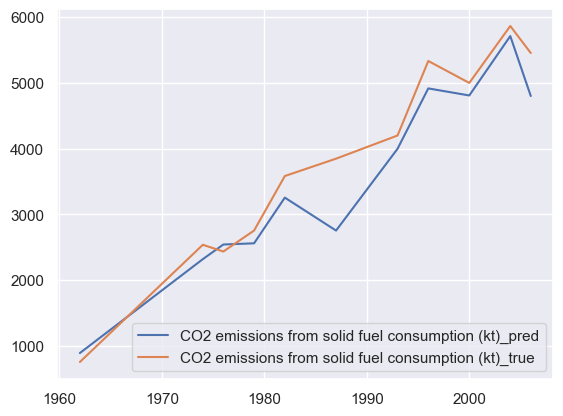

In [28]:
df_temp.sort_index().plot()

predict for column CO2 emissions (kg per 2010 US$ of GDP) with r2score : 0.9372277636114741


<Axes: >

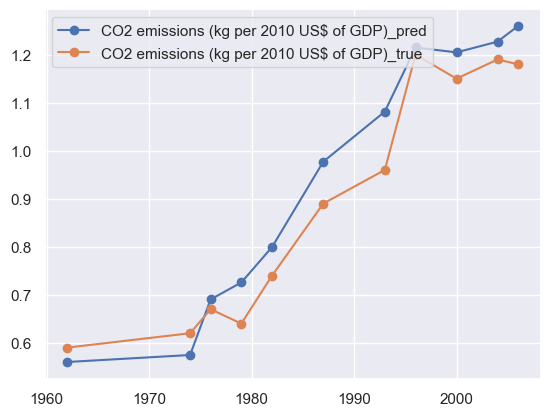

In [29]:
r2 = r2_score(*predict_df2.iloc[:,:2].dropna().T.values)
print(f"predict for column {df2.columns[0]} with r2score : {r2}")
predict_df2.iloc[:,:2].dropna().sort_index().plot(marker='o')

predict for column CO2 emissions (kt) with r2score : 0.9880691797340447


<Axes: >

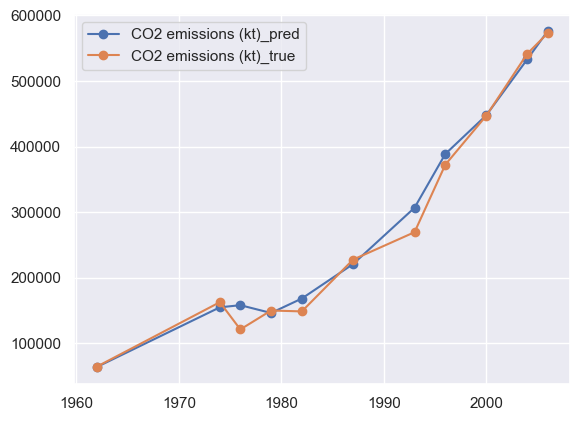

In [30]:
r2 = r2_score(*predict_df2.iloc[:,2:4].dropna().T.values)
print(f"predict for column {df2.columns[1]} with r2score : {r2}")
predict_df2.iloc[:,2:4].dropna().sort_index().plot(marker='o')

predict for column CO2 emissions (metric tons per capita) with r2score : 0.9255318890938972


<Axes: >

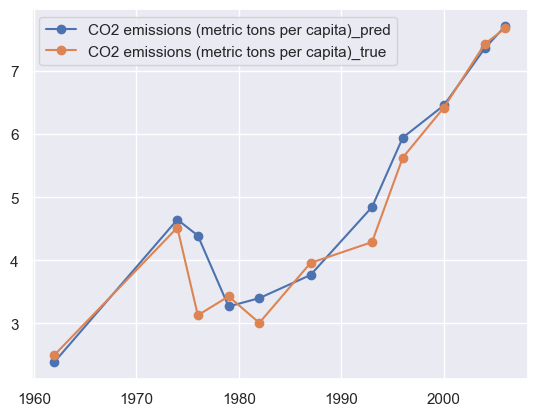

In [31]:
r2 = r2_score(*predict_df2.iloc[:,4:6].dropna().T.values)
print(f"predict for column {df2.columns[2]} with r2score : {r2}")
predict_df2.iloc[:,4:6].dropna().sort_index().plot(marker='o')

predict for column CO2 emissions from gaseous fuel consumption (% of total) with r2score : 0.9774404751080894


<Axes: >

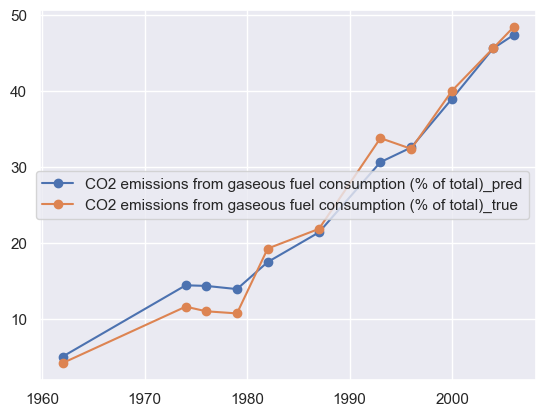

In [32]:
r2 = r2_score(*predict_df2.iloc[:,6:8].dropna().T.values)
print(f"predict for column {df2.columns[3]} with r2score : {r2}")
predict_df2.iloc[:,6:8].dropna().sort_index().plot(marker='o')

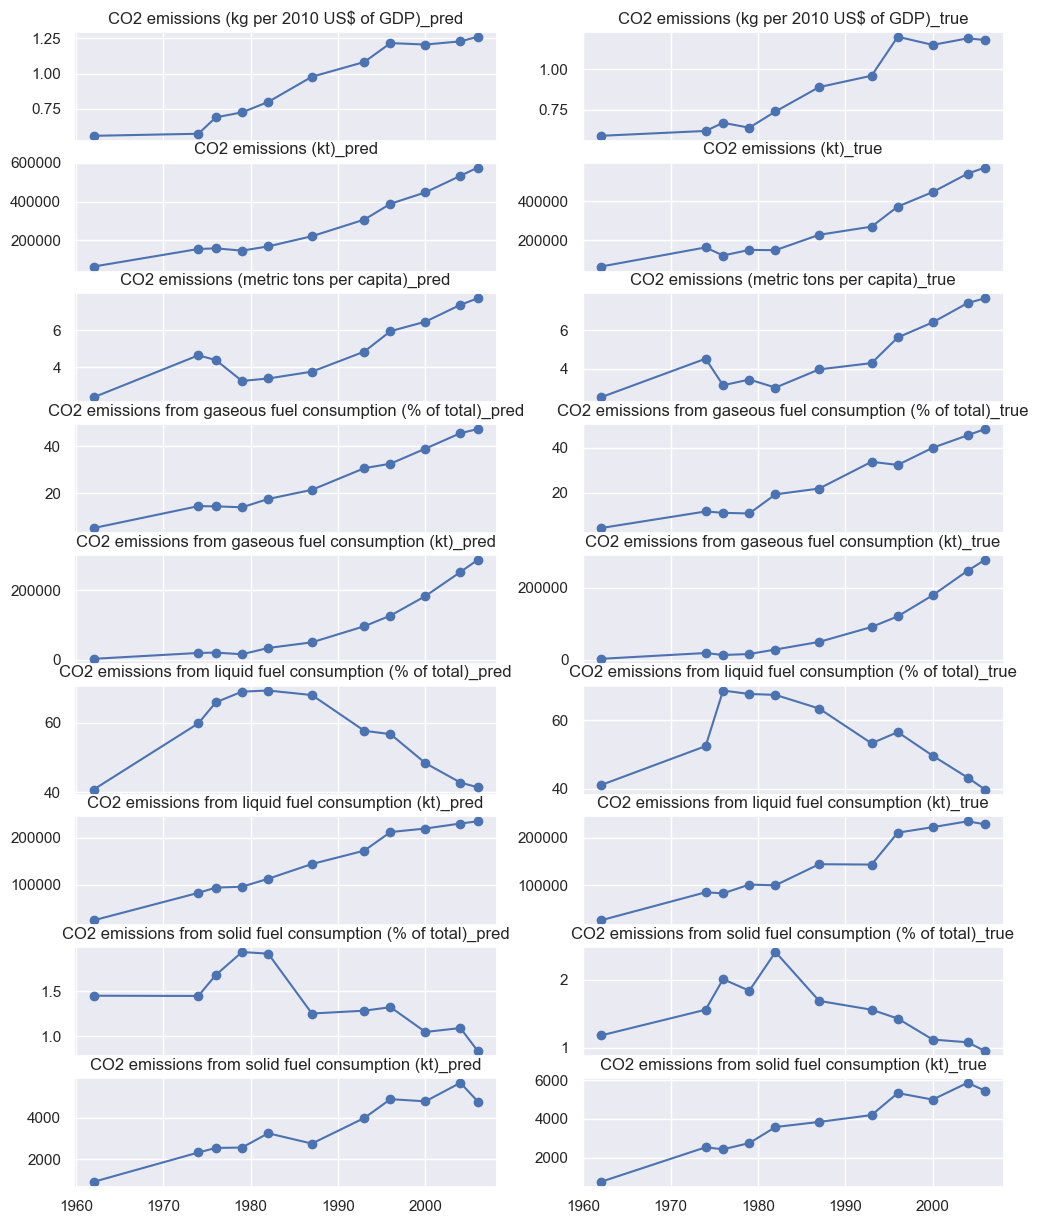

In [34]:
fig, axes = plt.subplots(nrows=len(predict_df2.columns)//2, ncols=2, figsize=(12, 15),sharex=True)
for i, col2 in enumerate(predict_df2.columns):

    predict_df2[col2].dropna().sort_index().plot(ax=axes[i//2, i%2], title=col2,marker='o')

In [ ]:
index
df = pd.concat([df, pd.DataFrame(index=df.index)], axis=0).sort_index(kind='stable', ignore_index=True)

In [ ]:
df3 = df2.f
df3

year
1960    11.510025
1961    11.510025
1962    11.510025
1963    10.703259
1964    10.517353
          ...    
2018    12.952516
2019    12.334776
2020     9.170044
2021    11.511183
2022    16.323879
Name: f, Length: 63, dtype: float64

In [ ]:
df3 = df.set_index("year")
# df3=df3.reindex(range(df.year.min() , 2034))
df3

,f,g,p,o
year,,,,
1960,NaN,1.369444e+12,3.031438e+09,3.045939
1961,NaN,1.425115e+12,3.072481e+09,2.992537
1962,11.510025,1.530069e+12,3.125457e+09,3.038068
1963,10.703259,1.648305e+12,3.190564e+09,3.141706
1964,10.517353,1.805674e+12,3.256065e+09,3.241921
...,...,...,...,...
2018,12.952516,8.643942e+13,7.591945e+09,NaN
2019,12.334776,8.779853e+13,7.673534e+09,NaN
2020,9.170044,NaN,7.820964e+09,NaN


In [34]:

def augmentation2(data:pd.DataFrame,n:int):
    # n=n
    df=pd.DataFrame(data,columns=["values"])
    nan_head=int(df.iloc[:,-1].head(10).isna().sum())
    for i in range(1,n+1):
        

        df[f"{i} day before value"]=df["values"].shift(i)
        if i == 1 :
            continue
        df[f"{i} day before diff"] = df[f"{i} day before value"].diff(i)

    # df=df.bfill(limit=n)
    # df=df.ffill(limit=1)
    
    # if df.isna().sum().sum():
    #    pass
        # df.fillna(df.mean())#,inplace=True)
    
    # index_nan = np.array(df.index)
    # print(df.head())
    nan_tail=max(df.iloc[:,-1].tail(10).dropna().index)
    # print()
    # print(nan_tail)
    # print()
    df.dropna(inplace=True)
    # cols = df.columns 
    # print(f"nan : {df.isna().sum()}")
    # print(df.tail())
    df = df.values
    scaler1 = StandardScaler()
    scaler2 = StandardScaler()
    y = scaler1.fit_transform(df[:,0].reshape(-1,1))
    X = scaler2.fit_transform(np.array(df[:,1:]),np.float32)
    # print("x",X.shape)
    # print(list(index_nan))
    return X , y , scaler1 , scaler2 , nan_tail , nan_head
    

In [63]:
# df3 = df.set_index("year")
# df3=df3.reindex(range(df.year.min() , 2034))
# # print(df3.g.values)
# test = augmentation(df3.p.values.reshape(-1,1))
# pd.DataFrame(test[0]).head()

nan : 0


,0,1,2,3,4
0,-1.645038,-1.639945,-2.110953,-1.634911,-3.813477
1,-1.592987,-1.590065,-1.985949,-1.585879,-2.625476
2,-1.541404,-1.537836,-1.669652,-1.535794,-1.948696
3,-1.489124,-1.486077,-1.494779,-1.483350,-1.708203
4,-1.433644,-1.433619,-1.473389,-1.431379,-1.517418


In [434]:

    
df3 = df.set_index("year")
df3=df3.reindex(range(df.year.min() , 2034))

def predict_past_future(data:list,indexs:list):
    
    min_index = min(indexs)
    max_index = max(indexs)
    X , y , scaler1 , scaler2 ,nan_tail=  augmentation2(data)
    indexs = indexs[:X.shape[0]]
    indexs2= np.array(indexs) - min_index
    X = np.concatenate((X, np.expand_dims(indexs2, axis=1)), axis=1)
    n_feature = X.shape[1]
    # print(X.shape)
    X_train=X.reshape(-1,n_feature,1)
    y_train=y.reshape(-1,1,1)
    lstm_model = model(X_train,y_train)
    past_y_pred=lstm_model.predict(X_train)
    past_y_ture = scaler1.inverse_transform(y.reshape(1,-1))

    df_pred_past=pd.DataFrame({"y_true":past_y_ture.flatten(),"y_pred":past_y_pred.flatten() ,"index":indexs}).set_index("index")
        
    y_true = []
    y_pred = []
    index_pred =  []
    y_pred.extend(data[-4:])
    # y_pred.extend(scaler1.inverse_transform(y.reshape(-1,1)[-4:]).reshape(-1))
    # start = X.shape[0]+nan_head -2
    start = nan_tail
    end = 2034 - min_index
    
    
  
    print("end",start , end)
    
    end = end - start
    for j in range(end):
        
      
        # if init >3 :
            # y , v_1 , v_2 , d_1 ,v_3, d_2
            # continue_ = False
        
        i = j+3
        # else:
        y = y_pred[i]
        v_1 = y_pred[i-1]
        v_2 = y_pred[i-2]
        v_3 = y_pred[i-3]
        d_1=  v_1 - v_2
        d_2 = v_2 - v_3
          


        # X_pred=scaler2.transform(np.array((v_1 , v_2 , d_1 ,v_3, d_2)).reshape(-1,1))
        # print(i)
        X_pred=scaler2.transform(np.array([v_1 , v_2 , d_1 ,v_3, d_2]).reshape(1,-1))
        X_pred = np.append(X_pred.reshape(-1), i)
        
        index_pred.append(j+min_index+start)
        # print("index",j+min_index+start)
        y_true.append(scaler1.inverse_transform(np.array(y).reshape(1,-1)))
        
        y_true.append(y)
        pred = lstm_model.predict(X_pred.reshape(-1,n_feature,1))
        y_pred.append(*scaler1.inverse_transform(np.array(pred).reshape(1,-1)).flatten())
        
        # data.append(y_pred[-1])
        
        
        

    else:
        print(y_pred)
        pritn(y_true[1:])
        df_pred_future=pd.DataFrame({"y_true":y_true[1:],"y_pred":y_pred[4:-1] ,"index":index_pred[1:]}).set_index("index")
        # return df_pred_future
        # return y_true[1:],y_pred[4:-1] , index_pred[1:]
        return df_pred_past , df_pred_future
        

In [79]:

    
df3 = df.set_index("year")
df3=df3.reindex(range(df.year.min() , 2034))

def predict_past_future2(data:list,indexs:list):
    
    n = 2
    
    min_index = min(indexs)
    max_index = max(indexs)
    X , y , scaler1 , scaler2 ,nan_tail,nan_head=  augmentation2(data,n)
    indexs = indexs[:X.shape[0]]
    indexs2= np.array(indexs) - min_index 
    X = np.concatenate((X, np.expand_dims(indexs2, axis=1)), axis=1)
    n_feature = X.shape[1]
    # print(X.shape)
    X_train=X.reshape(-1,n_feature,1)
    y_train=y.reshape(-1,1,1)
    lstm_model = model(X_train,y_train)
    past_y_pred=scaler1.inverse_transform(lstm_model.predict(X_train).reshape(1,-1))
    past_y_ture = scaler1.inverse_transform(y.reshape(1,-1))
    # print(index)
    past_index = np.array(indexs )+n
    df_pred_past=pd.DataFrame({"y_true":past_y_ture.flatten(),"y_pred":past_y_pred.flatten() ,"index":past_index}).set_index("index")
    y_true=[]
    y_pred = []
    index_pred =  []
    y_pred.extend(scaler1.inverse_transform(y.reshape(1,-1)).flatten()[-n-1:])
    # y_pred.extend(scaler1.inverse_transform(y.reshape(-1,1)[-4:]).reshape(-1))
    # start = X.shape[0]+nan_head -2
    # start = nan_tail
    end = 2034 - max(df_pred_past.index) 
    print("y_pred befor ",y_pred)
    print("range predict " , end)
    # end = end - start
    for j in range(end-1):
        
        # print("y_pred ",y_pred)
        # if init >3 :
            # y , v_1 , v_2 , d_1 ,v_3, d_2
            # continue_ = False
        
        i = j+n-1
        # else:
        
        y = y_pred[i]
        
        values = y_pred[j:-1][::-1]
        # for k in range(1,n):
            # values.append(y_pred[-k])
        
        diff_values = []
        for k in range(len(values)-1):
            diff_values.append(values[k+1]-values[k])
        
        values.extend(diff_values)
        # v_1 = y_pred[i-1]
        # v_2 = y_pred[i-2]
        # v_3 = y_pred[i-3]
        # v_4 = y_pred[i-(n-1)]
        # d_1=  v_1 - v_2
        # d_2 = v_2 - v_3
        # d_3 = v_3 - v_4
        # print("values : ",values)
        

        # X_pred=scaler2.transform(np.array((v_1 , v_2 , d_1 ,v_3, d_2)).reshape(-1,1))
        # print(i)
        index_pred.append(i+max(df_pred_past.index) - n +1)
        # X_pred=scaler2.transform(np.array([v_1 , v_2 , d_1,v_3,d_2,v_4,d_3] ).reshape(1,-1))#,v_3, d_2]).reshape(1,-1))
        X_pred=scaler2.transform(np.array(values ).reshape(1,-1))#,v_3, d_2]).reshape(1,-1))
        X_pred = np.append(X_pred.reshape(-1),index_pred[-1]-min_index +1)
        print("index : ",index_pred[-1]-min_index)
        # index_pred.append(j+min_index+start)
        # print("index",j+min_index+start)
        y_true.append(y)
        
        pred = lstm_model.predict(X_pred.reshape(-1,n_feature,1))
        y_pred.append(abs(*scaler1.inverse_transform(np.array(pred).reshape(1,-1)).flatten()))
        
        # data.append(y_pred[-1])
        
        
        del values
        del diff_values

    else:
        print(len(y_pred[abs(-n-1):]))
        print(len(index_pred[:]))
        print(y_pred)
        df_pred_future=pd.DataFrame({"y_pred":y_pred[n+1:] ,"index":index_pred[:]}).set_index("index")
        # df_pred_future=pd.DataFrame({"y_true":y_true[1:],"y_pred":y_pred[n:-1] ,"index":index_pred[1:]}).set_index("index")
        
        # return df_pred_future
        # return y_true[1:],y_pred[4:-1] , index_pred[1:]
        return df_pred_past , df_pred_future
        

In [80]:
data = list(df.g)
index=list(df.year)
df_pred_past , df_pred_future =predict_past_future2(data,index )

4
Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_56 (LSTM)               (None, 4, 100)            40800     
_________________________________________________________________
lstm_57 (LSTM)               (None, 100)               80400     
_________________________________________________________________
dense_56 (Dense)             (None, 10)                1010      
_________________________________________________________________
dense_57 (Dense)             (None, 1)                 11        
Total params: 122,221
Trainable params: 122,221
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
7/7 [==============================] - 7s 17ms/step - loss: 0.8725
Epoch 2/300
7/7 [==============================] - 0s 16ms/step - loss: 0.6231
Epoch 3/300
7/7 [==============================] - 0s 14ms/step - loss: 0.3624
Epoch 

In [81]:
df_pred_past

,y_true,y_pred
index,,
1962,1.805674e+12,1.557113e+12
1963,1.966277e+12,1.731255e+12
1964,2.133345e+12,1.927049e+12
1965,2.270952e+12,2.144400e+12
1966,2.451449e+12,2.363657e+12
1967,2.704652e+12,2.604215e+12
1968,2.961059e+12,2.915042e+12
1969,3.273350e+12,3.296200e+12
1970,3.777608e+12,3.693778e+12


In [82]:
df_pred_future

,y_pred
index,
2017,8.780438e+13
2018,9.012731e+13
2019,9.011752e+13
2020,9.136941e+13
2021,9.167520e+13
2022,9.253045e+13
2023,9.283034e+13
2024,9.341314e+13
2025,9.365276e+13


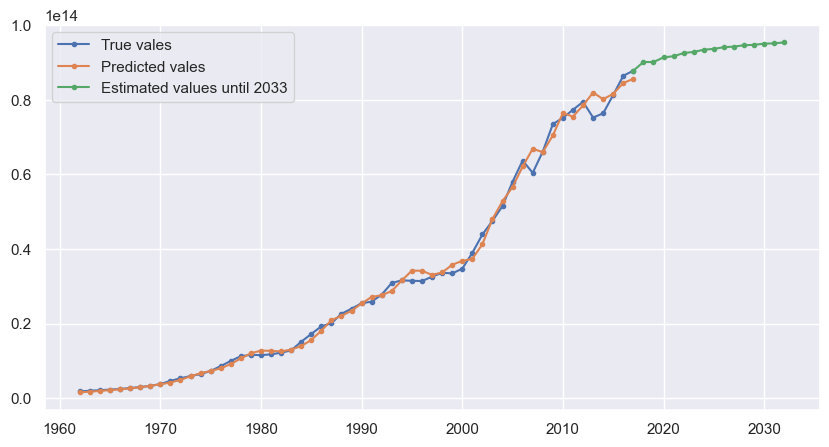

In [83]:
plt.figure(figsize=(10, 5))
plt.plot(df_pred_past.index,df_pred_past.iloc[:,0],marker='o',markersize=3,label='True vales')
plt.plot(df_pred_past.index,df_pred_past.iloc[:,1],marker='o',markersize=3,label='Predicted vales')
plt.plot(df_pred_future.index,df_pred_future.iloc[:,0],marker='o',markersize=3,label='Estimated values until 2033')

plt.legend()
plt.show()

In [84]:
# plt.plot(df_pred.index,df_pred.y_pred)d
# plt.plot(df_pred.index,df_pred.y_true)


In [ ]:
df_pred

[16.32387913801728,
 12.276105,
 16.237038,
 13.334044,
 16.67231,
 14.639403,
 17.144957,
 15.763622,
 17.56093,
 16.630638,
 17.845589,
 17.20475]

In [214]:
i

[12.276105,
 16.237038,
 13.334044,
 16.67231,
 14.639403,
 17.144957,
 15.763622,
 17.56093,
 16.630638,
 17.845589,
 17.20475,
 17.96743]

In [215]:
j

[2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033]

In [ ]:
y = df.iloc[i,0]
v_1 = df.iloc[i-1,0]
v_2 = df.iloc[i-2,0]
v_3 = df.iloc[i-3,0]

d_1=  v_1 - v_2
d_2 = v_2 - v_3

v_1 , v_2 , d_1 ,v_3, d_2



In [ ]:
np.arange(2023,2033)

array([2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032])

In [ ]:
# predict_past= pd.DataFrame()
# for col in range(df4.shape[0]):
#     scaler1 = StandardScaler()
#     data=scaler1.fit_transform(df4[col][pd.notna(df4[col])].reshape(-1,1))
#     index_pred = np.arange(df.year.min(),df.year.max())
#     y_pred= train_predict(data,indexs[:data.shape[0]] , index_pred)
#     col_name = str(df2.columns[col])
#     dict_temp = {col_name+"_pred":scaler1.inverse_transform(y_pred).reshape(-1) }

#     df_temp=pd.DataFrame(dict_temp,index=index_pred.astype(int))
#     predict_past = pd.concat([predict_past,df_temp],axis=1)

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_20 (LSTM)              (None, 1, 100)            40800     
                                                                 
 lstm_21 (LSTM)              (None, 100)               80400     
                                                                 
 dense_20 (Dense)            (None, 10)                1010      
                                                                 
 dense_21 (Dense)            (None, 1)                 11        
                                                                 
Total params: 122221 (477.43 KB)
Trainable params: 122221 (477.43 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/500
2/2 [==============================] - 4s 19ms/step - loss: 1.0159
Epoch 2/500
2/2 [==============================] - 0s 19ms/step - 

In [ ]:
# df4 = df2.values.T
# indexs = np.array(df.year,dtype=np.float32)
# predict_future= pd.DataFrame()

# for col in range(df4.shape[0]):
#     scaler1 = StandardScaler()
#     data=scaler1.fit_transform(df4[col][pd.notna(df4[col])].reshape(-1,1))
#     index_train=indexs[:data.shape[0]]
#     index_pred = np.arange(predict_past.iloc[:,col].dropna().index.max(),2033)
#     y_pred= train_predict(data,index_train , index_pred)
#     col_name = str(df2.columns[col])
#     dict_temp = {col_name+"_pred":scaler1.inverse_transform(y_pred).reshape(-1) }

#     df_temp=pd.DataFrame(dict_temp,index=index_pred.astype(int))
#     predict_future = pd.concat([predict_future,df_temp],axis=1)


Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_60 (LSTM)              (None, 1, 100)            40800     
                                                                 
 lstm_61 (LSTM)              (None, 100)               80400     
                                                                 
 dense_60 (Dense)            (None, 10)                1010      
                                                                 
 dense_61 (Dense)            (None, 1)                 11        
                                                                 
Total params: 122221 (477.43 KB)
Trainable params: 122221 (477.43 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/500
2/2 [==============================] - 5s 20ms/step - loss: 1.0024
Epoch 2/500
2/2 [==============================] - 0s 19ms/step - 

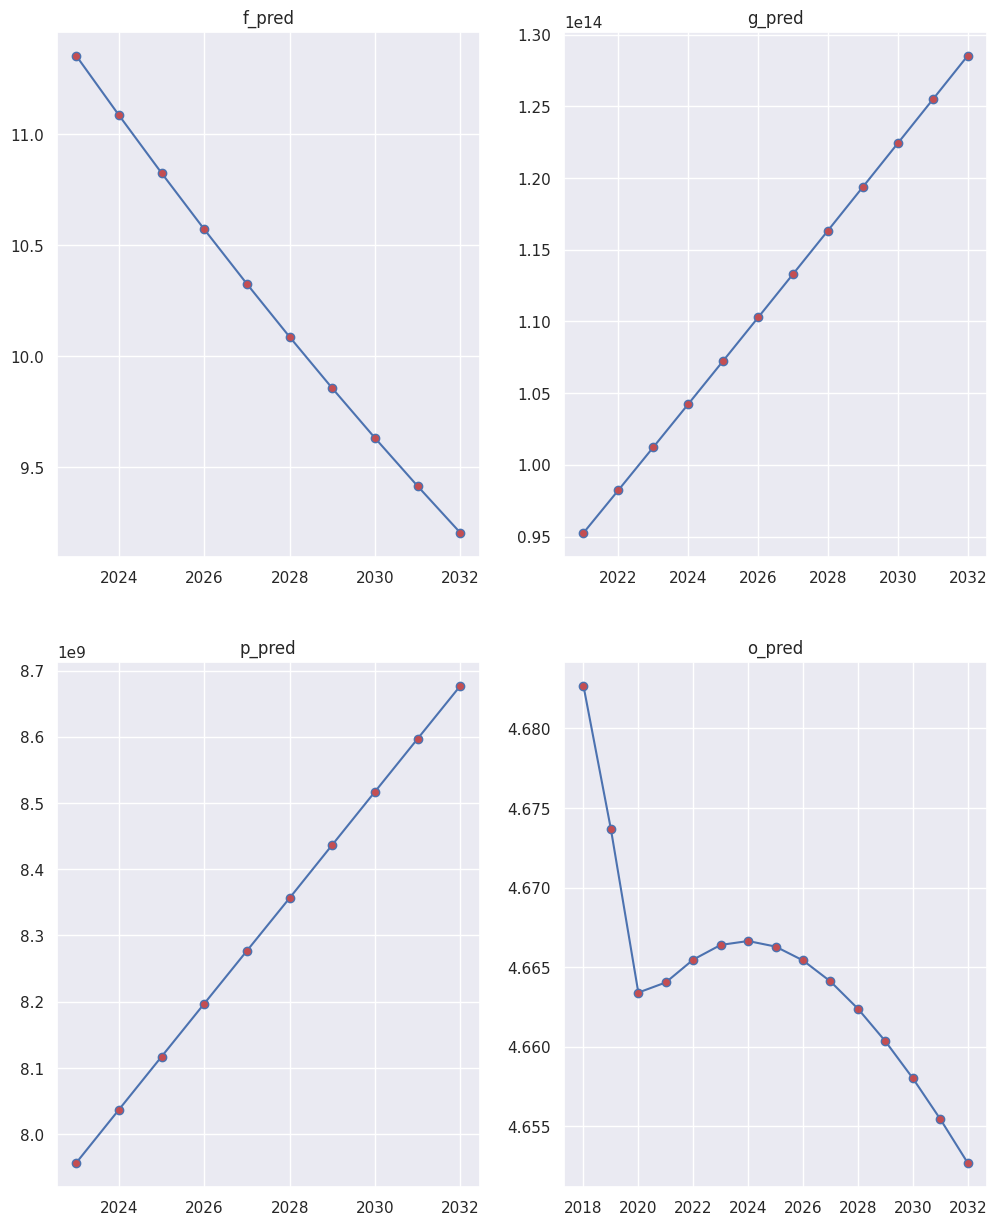

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 15))
for i, col2 in enumerate(predict_future.columns):

    predict_future[col2].dropna().sort_index().plot(ax=axes[i//2, i%2], title=col2,marker='o')

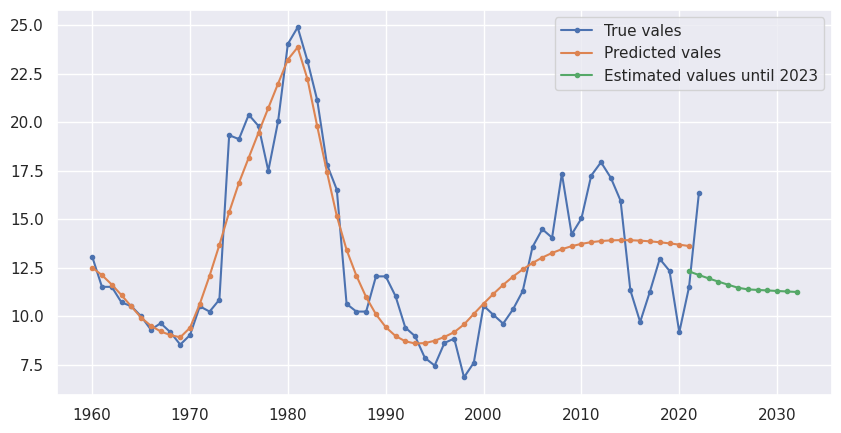

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(df2.index,df2.iloc[:,0],marker='o',markersize=3,label='True vales')
plt.plot(predict_past.index,predict_past.iloc[:,0],marker='o',markersize=3,label='Predicted vales')
plt.plot(predict_future.index,predict_future.iloc[:,0],marker='o',markersize=3,label='Estimated values until 2023')

plt.legend()
plt.show()

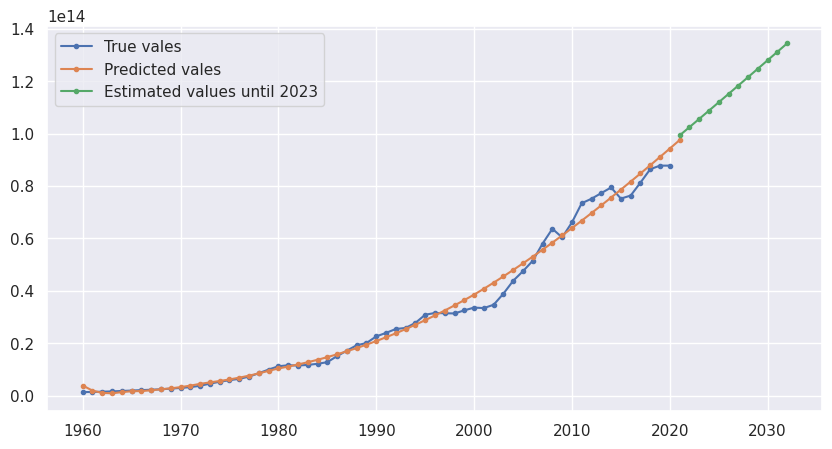

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(df2.index,df2.iloc[:,1],marker='o',markersize=3,label='True vales')
plt.plot(predict_past.index,predict_past.iloc[:,1],marker='o',markersize=3,label='Predicted vales')
plt.plot(predict_future.index,predict_future.iloc[:,1],marker='o',markersize=3,label='Estimated values until 2023')


plt.legend()
plt.show()

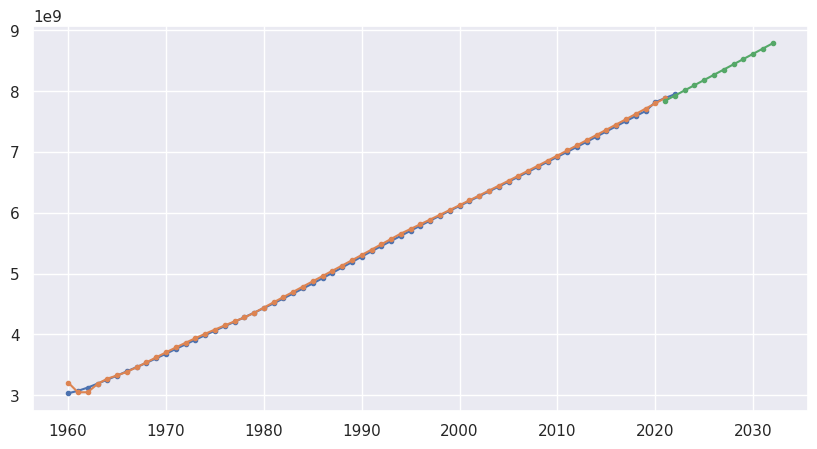

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(df2.index,df2.iloc[:,2],marker='o',markersize=3,label='True vales')
plt.plot(predict_past.index,predict_past.iloc[:,2],marker='o',markersize=3,label='Predicted vales')
plt.plot(predict_future.index,predict_future.iloc[:,2],marker='o',markersize=3,label='Estimated values until 2023')


plt.legend()
plt.show()

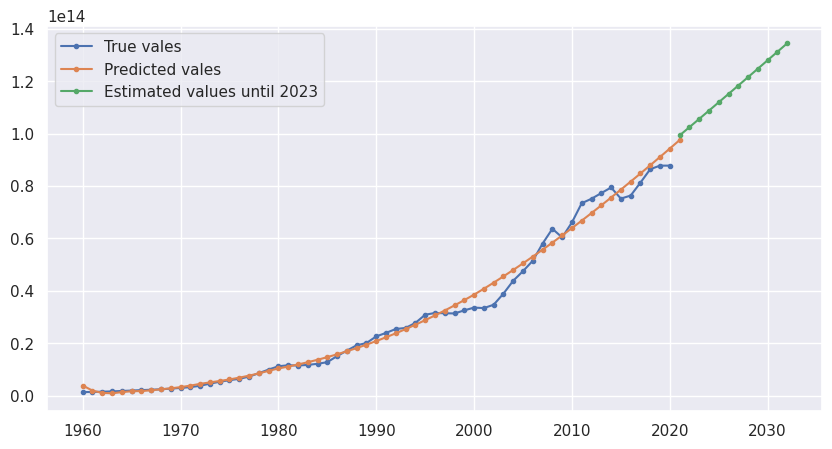

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(df2.index,df2.iloc[:,1],marker='o',markersize=3,label='True vales')
plt.plot(predict_past.index,predict_past.iloc[:,1],marker='o',markersize=3,label='Predicted vales')
plt.plot(predict_future.index,predict_future.iloc[:,1],marker='o',markersize=3,label='Estimated values until 2023')

plt.legend()
plt.show()